# Market Indices


In [1]:
#!/usr/bin/env python3.8.10
import pandas as pd
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal
from datetime import date
import datetime 
import sys
sys.path.append('./lib/')
from functions import *

In [2]:
# Stok indices
# Retrieve financial data for indices from "https://finance.yahoo.com/world-indices"
# ^GSPC: Standard and Poor's 500
# ^DJI: Dow Jones Industrial Index
# ^IXIC: NASDAQ_Composite
# ^RUT: Russel 2000
# S&P 500 (^SPX) options: https://finance.yahoo.com/quote/%5ESPX/options?p=%5ESPX

In [3]:
# Set start date
start = date.today() - datetime.timedelta(weeks=52)
# Set end date
end = date.today()

# To evaluate the difference between the dates in terms of business days.
print(f'Days between dates: {(end - start).days} days')

nyse = mcal.get_calendar('NYSE')
bizdays = nyse.valid_days(start_date=start, end_date=end)

print(f'Business days between dates: {len(bizdays)} days')

Days between dates: 364 days
Business days between dates: 253 days


We concentrate on the Standard and Poor's 500 Index.
<br> In case, we also remove the last row, which appears to be essentially a repetition of the penultimate row.

In [4]:
# We concentrate on the Standard and Poor's 500 Index
GSPC_df = read_data_from_yahoo('^GSPC', start, end)
# Compute the logarithm return for each index dataframe
GSPC_df = log_return(GSPC_df)

GSPC_df['Date'] = pd.to_datetime(GSPC_df['Date'],
                                 format='%Y-%m-%d').dt.strftime('%d-%m-%Y')
GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close,y_lr,y_plr
0,06-04-2021,4086.229980,4068.139893,4075.570068,4073.939941,4027880000,4073.939941,-0.000974,-0.097400
1,07-04-2021,4083.129883,4068.310059,4074.290039,4079.949951,4112640000,4079.949951,0.001474,0.147415
2,08-04-2021,4098.189941,4082.540039,4089.949951,4097.169922,3901910000,4097.169922,0.004212,0.421175
3,09-04-2021,4129.479980,4095.510010,4096.109863,4128.799805,3634910000,4128.799805,0.007690,0.769029
4,12-04-2021,4131.759766,4114.819824,4124.709961,4127.990234,3578500000,4127.990234,-0.000196,-0.019610
...,...,...,...,...,...,...,...,...,...
247,28-03-2022,4575.649902,4517.689941,4541.089844,4575.520020,3696850000,4575.520020,0.007120,0.711955
248,29-03-2022,4637.299805,4589.660156,4602.859863,4631.600098,4239660000,4631.600098,0.012182,1.218204
249,30-03-2022,4627.770020,4581.319824,4624.200195,4602.450195,3665390000,4602.450195,-0.006314,-0.631359
250,31-03-2022,4603.069824,4530.410156,4599.020020,4530.410156,3782040000,4530.410156,-0.015776,-1.577634


Intercept: 4224.841084962837, Index: 1.5693487970708253


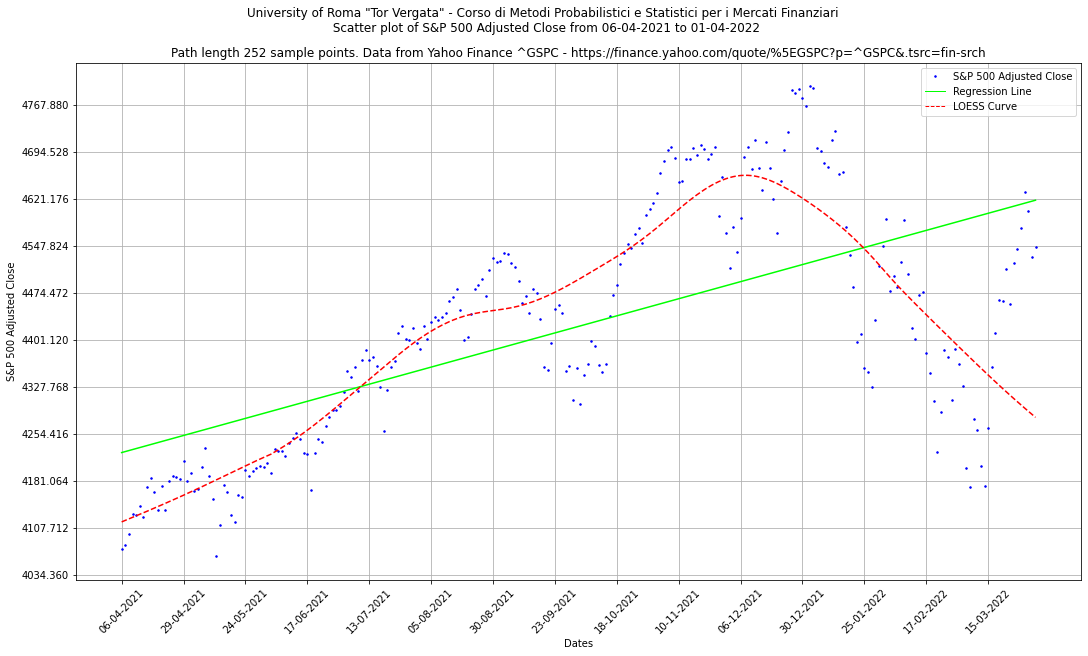

In [5]:
# Hence, we plot the GSPC adjusted close
link = "https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch"
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 4224.841084962837, Index: 1.5693487970708253


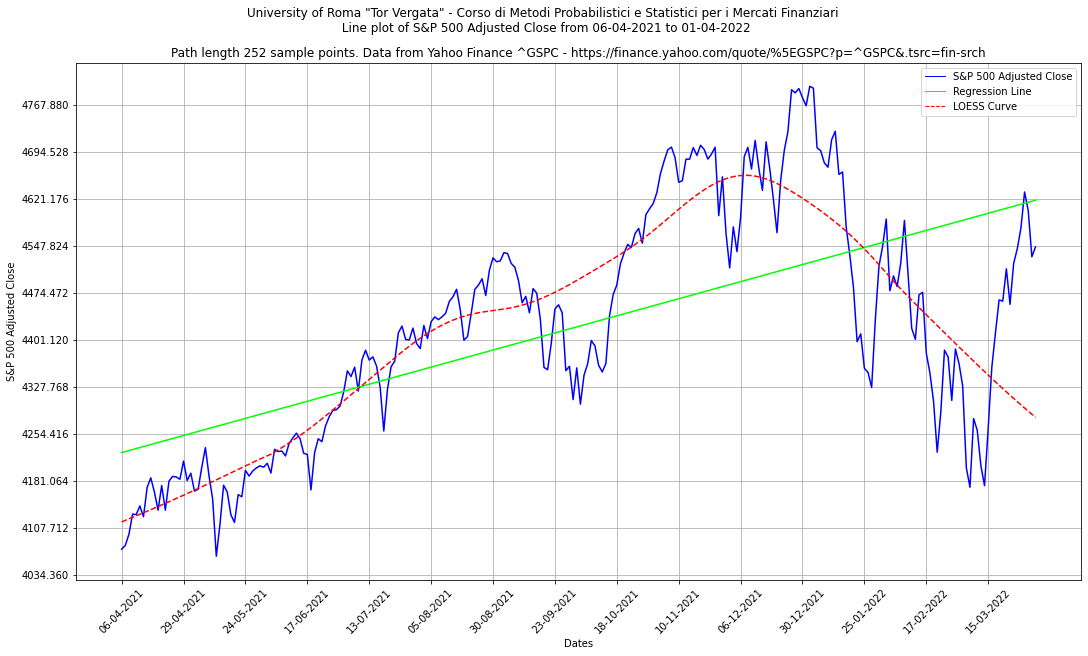

In [6]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='Adj Close')

Intercept: 0.10375751944600796, Index: -0.0004832626040016892


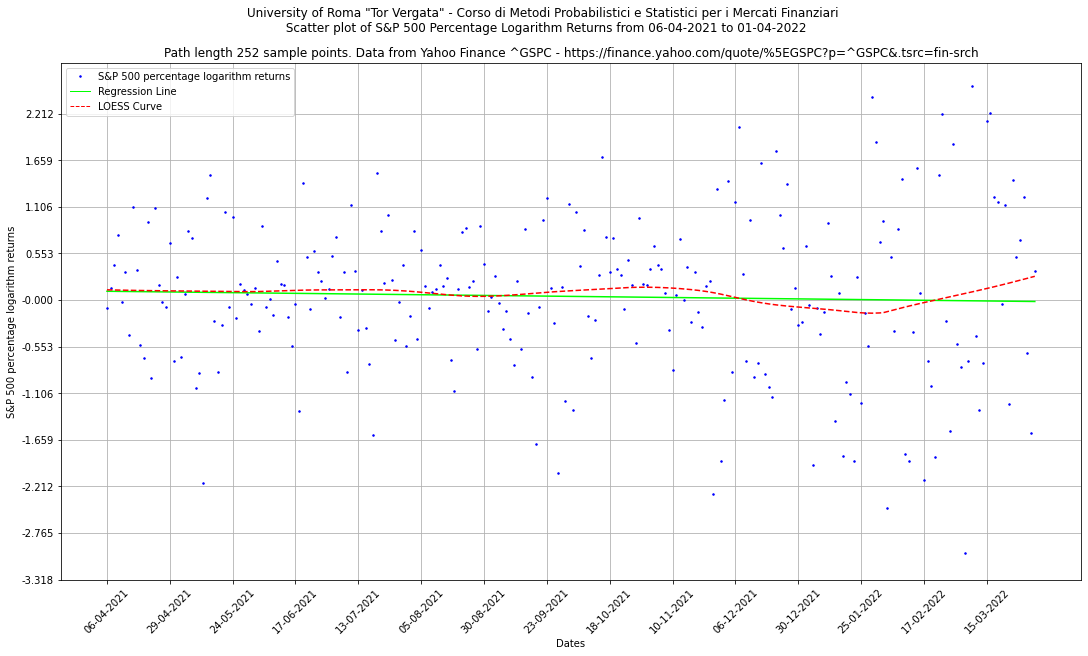

In [9]:
data_visualization(GSPC_df, kind='scatter', symbol='^GSPC',
                   link=link, column='y_plr')

Intercept: 0.10375751944600796, Index: -0.0004832626040016892


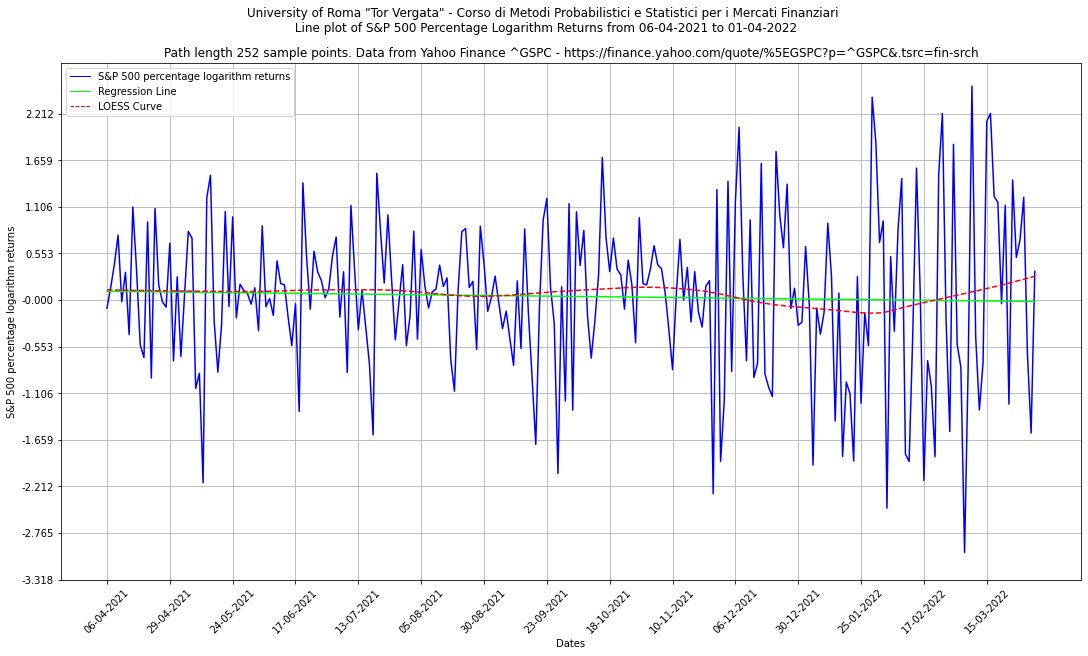

In [8]:
data_visualization(GSPC_df, kind='line', symbol='^GSPC',
                   link=link, column='y_plr')

Autocorrelogram

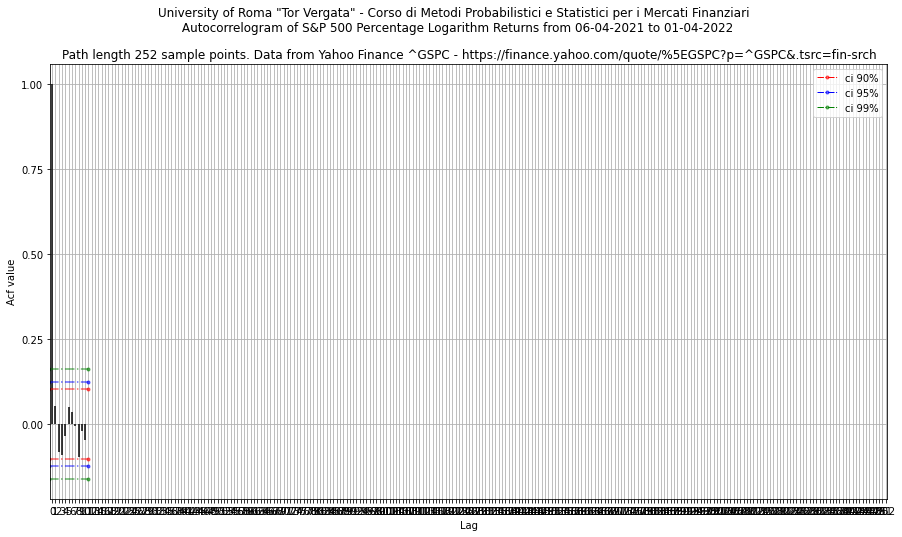

In [ ]:
link = "https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC&.tsrc=fin-srch"
autocorrelogram_plot(GSPC_df, link=link, symbol='^GSPC')